In [1]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import joblib

In [2]:
import dask.dataframe as dd
from dask.distributed import Client

In [3]:
client = Client(n_workers=12, memory_limit='16GB')

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 12
Total threads: 12,Total memory: 178.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60561,Workers: 12
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 178.81 GiB
Comm: tcp://127.0.0.1:60621,Total threads: 1
Dashboard: http://127.0.0.1:60638/status,Memory: 14.90 GiB
Nanny: tcp://127.0.0.1:60564,


In [ ]:
# df = dd.read_csv(r'D:\00 Datasets\CICAPT-IIoT Dataset\Network_Traffic\Phase2\phase2_NetworkData.csv', blocksize = '80MB')
df = dd.read_csv(r'D:\00 Datasets\CICAPT-IIoT Dataset\Network_Traffic\Phase2\phase2_NetworkData.csv', dtype={'subLabel': 'object', 'subLabelCat': 'object'})
df

In [ ]:
# Compute the number of rows
num_rows = df.shape[0].compute()
# Print the number of rows
print("Number of rows:", num_rows)

# Compute the number of columns
num_columns = len(df.columns)

# Print the number of columns
print("Number of columns:", num_columns)

In [ ]:
# To print the column names
print(df.columns)

In [ ]:
df.head()  # conda install -c conda-forge msgpack-python==1.0.5

In [ ]:
df.isna().sum()

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Columns with non-numeric values:")
print(non_numeric_columns)

In [ ]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()  

In [ ]:
# List of non-numeric columns to check and drop
# non_numeric_cols = ['Source IP', 'Destination IP', 'Protocol_name', 'label', 'subLabel', 'subLabelCat']

# Step 1: Check the number of unique values in non-numeric columns
for col in non_numeric_columns:
    unique_values = df[col].nunique().compute()  # Compute to get the actual number of unique values
    print(f"Column '{col}' has {unique_values} unique values.")

# Step 2: Drop the specified non-numeric columns and create a new DataFrame
df_dropped = df.drop(columns = non_numeric_columns)

# Step 3: Save the new DataFrame as a CSV file
output_csv = "df_dropped_phase2.csv"
df_dropped.to_csv(output_csv, single_file=True, index=False)

print(f"New DataFrame saved as '{output_csv}'")


In [7]:
df_dropped_phase2 = dd.read_csv(r'df_dropped_phase2.csv', blocksize = '80MB')
df_dropped_phase2

,ts,flow_duration,Header_Length,Source Port,Destination Port,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,urg_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,max_duration,min_duration,sum_duration,average_duration,std_duration,CoAP,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IGMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,MAC,Magnitue,Radius,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label
npartitions=50,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [8]:
# Remove leading and trailing spaces from column names
df_dropped_phase2.columns = df_dropped_phase2.columns.str.strip()  

In [9]:
df_dropped_phase2 = dd.read_csv(r'df_dropped_phase2.csv', blocksize = '80MB')
df_dropped_phase2
df_dropped_phase2.head()

,ts,flow_duration,Header_Length,Source Port,Destination Port,Protocol Type,Duration,Rate,Srate,Drate,...,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label
0,1.701728e+09,0.000000,1514,80,48884,6,127,0.000000,0.000000,0.0,...,0.000000,0.0,1,0,0,0,0,1.701728e+09,0.000000,0
1,1.701728e+09,0.000548,1568,48884,80,6,64,3650.395126,3650.395126,0.0,...,532900.000000,1.0,4,0,0,0,0,5.478859e-04,0.000548,0
2,1.701728e+09,0.002528,1622,48884,80,6,64,1186.731302,1186.731302,0.0,...,473688.888889,1.0,9,0,0,0,0,1.980066e-03,0.002528,0
3,1.701728e+09,0.004881,1676,48884,80,6,64,819.520125,819.520125,0.0,...,399675.000000,1.0,16,0,0,0,0,2.352953e-03,0.004881,0
4,1.701728e+09,0.007555,3189,80,48884,6,127,661.812674,661.812674,0.0,...,511233.760000,1.0,25,0,0,0,0,2.674103e-03,0.007555,0


In [ ]:
df_dropped_computed = df_dropped_phase2.compute()  # Convert Dask DataFrame to Pandas


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming df_dropped is a Dask DataFrame, we'll compute it to work with sklearn PCA
df_dropped_computed = df_dropped_phase2.compute()  # Convert Dask DataFrame to Pandas

# Applying PCA
pca = PCA()
pca.fit(df_dropped_computed)
df_pca_all = pca.transform(df_dropped_computed)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Plot eigenvalues
plt.bar(np.arange(0, df_dropped_computed.shape[1], 1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.show()


NameError: name 'df_dropped_phase2' is not defined

In [ ]:
eigenvalues

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming df_dropped_computed is already computed and ready for PCA
pca = PCA()
pca.fit(df_dropped_computed)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.axhline(y=0.90, color='r', linestyle='-')  # 90% variance threshold line
plt.axhline(y=0.95, color='g', linestyle='--')  # 95% variance threshold line
plt.grid(True)
plt.show()


In [ ]:
# Examine the First Few Principal Components: 
print(explained_variance_ratio[:5])  # Look at the first few components


In [ ]:
# Choose a Variance Threshold: 
# Find the number of components that explain at least 90% of the variance
num_components_90_variance = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"Number of components explaining 90% of variance: {num_components_90_variance}")


In [ ]:
# Transform the data using the first 2 or 3 components
df_pca_2d = pca.transform(df_dropped_computed)[:, :2]

# Plot the data projected onto the first two components
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Access the loadings (coefficients) of the first principal component
first_component_loadings = pca.components_[0]

# Pair the feature names with their corresponding loadings
feature_importance = zip(df_dropped_computed.columns, first_component_loadings)

# Sort features by their contribution to the first principal component
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Print the features and their loadings
print("Top contributing features to the first principal component:")
for feature, loading in sorted_features[:10]:  # Top 10 features
    print(f"{feature}: {loading}")


In [ ]:
# Project the data onto the first principal component
df_pca_1d = df_pca_all[:, 0]

# Plot the first component
plt.hist(df_pca_1d, bins=50)
plt.title('Distribution of First Principal Component')
plt.xlabel('First Principal Component')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Components')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_dropped_computed is your computed Pandas DataFrame

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_dropped_computed)

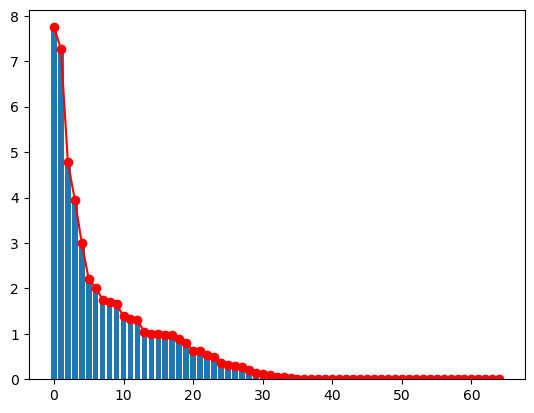

Number of components explaining 90% of variance: 19


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_dropped_computed is your computed Pandas DataFrame

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_dropped_computed)

# Applying PCA
pca = PCA()
pca.fit(df_standardized)
df_pca_all = pca.transform(df_standardized)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Plot eigenvalues
plt.bar(np.arange(0, df_standardized.shape[1], 1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.show()

# Print the number of components explaining 90% of variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"Number of components explaining 90% of variance: {n_components_90}")


In [23]:
# Using Joblib to Save and Load the PCA Output
# import joblib

# Save the PCA model and the transformed data
joblib.dump(pca, 'pca_model.pkl')  # Save the PCA model
joblib.dump(df_pca_all, 'pca_transformed_data.pkl')  # Save the PCA-transformed data

# Also save the number of components explaining 90% of the variance
joblib.dump(n_components_90, 'n_components_90.pkl')


['n_components_90.pkl']

In [13]:
# Load the saved PCA model, transformed data, and the number of components
pca = joblib.load('pca_model.pkl')
df_pca_all = joblib.load('pca_transformed_data.pkl')
n_components_90 = joblib.load('n_components_90.pkl')

print(f"Number of components explaining 90% of variance: {n_components_90}")


Number of components explaining 90% of variance: 19


In [ ]:
# Using Pickle Saving the results:
import pickle

# Save the PCA model and the transformed data
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)

with open('pca_transformed_data.pkl', 'wb') as f:
    pickle.dump(df_pca_all, f)

with open('n_components_90.pkl', 'wb') as f:
    pickle.dump(n_components_90, f)


In [ ]:
# Loading the result
with open('pca_model.pkl', 'rb') as f:
    pca = pickle.load(f)

with open('pca_transformed_data.pkl', 'rb') as f:
    df_pca_all = pickle.load(f)

with open('n_components_90.pkl', 'rb') as f:
    n_components_90 = pickle.load(f)

print(f"Number of components explaining 90% of variance: {n_components_90}")


In [20]:
# Get the PCA components (loadings)
components = pca.components_

# Select the first few principal components, say top 3
top_n_components = 3  # You can change this value to explore more components

for i in range(top_n_components):
    print(f"Top contributing features to the {i+1} principal component:")
    # Get the absolute values of the loadings for the i-th component
    loadings = np.abs(components[i])
    
    # Get the indices of the sorted loadings in descending order
    sorted_indices = np.argsort(loadings)[::-1]
    
    # Print the feature names and their corresponding loadings
    for idx in sorted_indices[:10]:  # Show top 10 contributing features
        print(f"{df_dropped_computed.columns[idx]}: {components[i][idx]}")
    print("\n")


Top contributing features to the 1 principal component:
sum_duration: 0.9999999999995487
flow_idle_time: -9.493299610450064e-07
Header_Length: 4.380150400650295e-08
IAT: 9.176655535365176e-10
rst_count: 5.776915094758571e-10
urg_count: 3.789070042939573e-10
Destination Port: 3.73734371414375e-10
MAC: -2.666094302866732e-10
Source Port: -2.449806738887498e-10
Covariance: -1.2389618508859538e-10


Top contributing features to the 2 principal component:
IAT: 0.9999998805421224
flow_idle_time: 0.0004887409898698179
min_duration: -3.8608023836462415e-06
average_duration: -3.860746833245688e-06
max_duration: -3.8607334595475065e-06
Covariance: 1.6909555379735453e-06
Tot sum: 6.187106287110002e-07
Weight: 1.3570485260948097e-07
Header_Length: -8.922571172317526e-08
MAC: 1.4649125731882368e-08


Top contributing features to the 3 principal component:
flow_idle_time: 0.9999998776167158
IAT: -0.0004887409570666201
Header_Length: -7.468040760949535e-05
Destination Port: -1.142020775064985e-05
Sou

In [ ]:
# Using Pandas and HDF5: 
import pandas as pd

# Assuming df_pca_all is a NumPy array, convert it to a Pandas DataFrame
df_pca_all_df = pd.DataFrame(df_pca_all)

# Save to HDF5 format
df_pca_all_df.to_hdf('pca_transformed_data.h5', key='df', mode='w')

# Save the number of components and PCA model separately
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(n_components_90, 'n_components_90.pkl')


In [ ]:
# Load the PCA-transformed data from HDF5
df_pca_all_df = pd.read_hdf('pca_transformed_data.h5', key='df')

# Convert back to NumPy array if needed
df_pca_all = df_pca_all_df.values

# Load the PCA model and number of components
pca = joblib.load('pca_model.pkl')
n_components_90 = joblib.load('n_components_90.pkl')

print(f"Number of components explaining 90% of variance: {n_components_90}")


In [ ]:
# DASK
import dask.dataframe as dd
from dask_ml.decomposition import IncrementalPCA
from dask_ml.preprocessing import StandardScaler
from dask.distributed import Client

# Optionally, start a Dask distributed client (for parallel computing)
client = Client()

# Assuming df_dropped_computed is your original Pandas DataFrame
# Convert it to a Dask DataFrame
df_dask = dd.from_pandas(df_dropped_computed, npartitions=10)

# Standardize the data using Dask's StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_dask)

# Apply Incremental PCA to handle large datasets
ipca = IncrementalPCA(n_components=n_components_90, batch_size=10000)
df_pca_all = ipca.fit_transform(df_standardized)

# Since Dask works lazily, we need to compute the result explicitly
df_pca_all = df_pca_all.compute()

# Now you can save the PCA results or perform clustering


In [11]:
df_dropped_phase2 = dd.read_csv(r'df_dropped_phase2.csv', blocksize = '80MB')
df_dropped_phase2
df_dropped_phase2.head()

,ts,flow_duration,Header_Length,Source Port,Destination Port,Protocol Type,Duration,Rate,Srate,Drate,...,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label
0,1.701728e+09,0.000000,1514,80,48884,6,127,0.000000,0.000000,0.0,...,0.000000,0.0,1,0,0,0,0,1.701728e+09,0.000000,0
1,1.701728e+09,0.000548,1568,48884,80,6,64,3650.395126,3650.395126,0.0,...,532900.000000,1.0,4,0,0,0,0,5.478859e-04,0.000548,0
2,1.701728e+09,0.002528,1622,48884,80,6,64,1186.731302,1186.731302,0.0,...,473688.888889,1.0,9,0,0,0,0,1.980066e-03,0.002528,0
3,1.701728e+09,0.004881,1676,48884,80,6,64,819.520125,819.520125,0.0,...,399675.000000,1.0,16,0,0,0,0,2.352953e-03,0.004881,0
4,1.701728e+09,0.007555,3189,80,48884,6,127,661.812674,661.812674,0.0,...,511233.760000,1.0,25,0,0,0,0,2.674103e-03,0.007555,0


In [16]:
df_dropped_computed = df_dropped_phase2.compute()  # Convert Dask DataFrame to Pandas

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_dropped_computed is your computed Pandas DataFrame

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_dropped_computed)

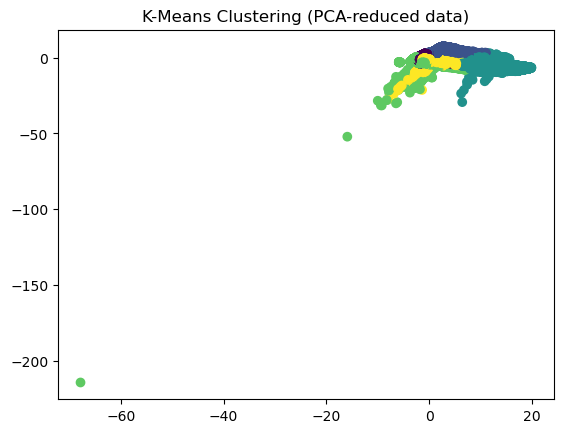

In [18]:
from sklearn.cluster import KMeans
import joblib

# Using the reduced dimensions that explain 90% of the variance
pca_90 = PCA(n_components=n_components_90)
df_pca_90 = pca_90.fit_transform(df_standardized)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters (k)
kmeans.fit(df_pca_90)

# Cluster assignments
clusters = kmeans.labels_

# Visualize clusters (using the first two components for simplicity)
plt.scatter(df_pca_90[:, 0], df_pca_90[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering (PCA-reduced data)")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune the eps and min_samples parameters
dbscan.fit(df_pca_90)

# Cluster assignments
dbscan_clusters = dbscan.labels_

# Visualize clusters
plt.scatter(df_pca_90[:, 0], df_pca_90[:, 1], c=dbscan_clusters, cmap='plasma')
plt.title("DBSCAN Clustering (PCA-reduced data)")
plt.show()


In [ ]:
Source_IP_names = df['Source IP'].unique().compute()

print("Number of Source IP Names:", len(Source_IP_names))
print("Source IP Names:")
print(Source_IP_names)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming df_dropped is a Dask DataFrame, we'll compute it to work with sklearn PCA
df_dropped_computed = df_dropped.compute()  # Convert Dask DataFrame to Pandas

# Applying PCA
pca = PCA()
pca.fit(df_dropped_computed)
df_pca_all = pca.transform(df_dropped_computed)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Plot eigenvalues
plt.bar(np.arange(0, df_dropped_computed.shape[1], 1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.show()


In [ ]:
Destination_IP_names = df['Destination IP'].unique().compute()

print("Number of Destination IP Names:", len(Destination_IP_names))
print("Source IP Names:")
print(Destination_IP_names)

In [ ]:
unique_protocol_names = df['Protocol_name'].unique().compute()

print("Number of Unique Protocol Names:", len(unique_protocol_names))
print("Unique Protocol Names:")
print(unique_protocol_names)

In [ ]:
label_names = df['label'].unique().compute()

print("Number of label_names:", len(label_names))
print("label_names:")
print(label_names)

In [ ]:
subLabel_names = df['subLabel'].unique().compute() 

print("Number of subLabel_names:", len(subLabel_names))
print("subLabel_names:")
print(subLabel_names)

In [ ]:
subLabelCat_names = df['subLabelCat'].unique().compute()

print("Number of subLabelCat_names:", len(subLabelCat_names))
print("subLabelCat_names:")
print(subLabelCat_names)

In [ ]:
# Step 1: Convert the relevant columns to categorical type
df = df.categorize(columns=['Source IP', 'Destination IP', 'Protocol_name'])

# Step 2: Apply one-hot encoding using Dask's get_dummies
df_encoded = dd.get_dummies(df, columns=['Source IP', 'Destination IP', 'Protocol_name'])

# Step 3: Display the first few rows of the transformed DataFrame
print(df_encoded.head())

In [ ]:
# To display the first few rows of data
df_encoded.head()  # By default, it shows the first 5 rows

In [ ]:
# Save the filtered DataFrame to a CSV file
# df_encoded.to_csv('df_encoded/*.csv', index=False, single_file=True)  # Save as a single CSV file
df_encoded.to_csv('df_encoded.csv', index=False, single_file=True)

print("Encoded Columns saved as df_encoded.csv'.")

In [ ]:
mean_values = df_encoded.mean()  # Returns a series
print(mean_values)  

In [ ]:
df_encoded.head()

num_rows = df_encoded.shape[0]
num_cols = df_encoded.shape[1]

print("Number of rows in the sample:", num_rows)
print("Number of columns in the sample:", num_cols)

In [ ]:
df_encoded.describe()